Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Python version: 3.11.11
Tensorflow version: 2.18.0
Keras version: 3.8.0
rm: refusing to remove '.' or '..' directory: skipping './'
x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


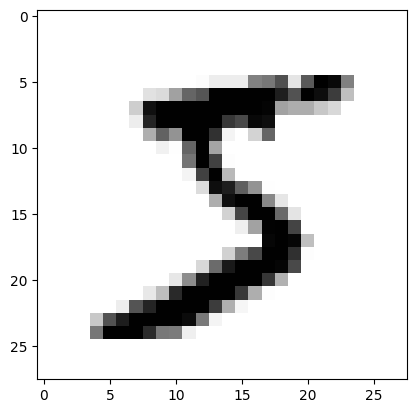

In [12]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform





print('Python version:',platform.python_version())
print('Tensorflow version:',tf.__version__)
print('Keras version:',tf.keras.__version__)



!rm -rf ./ ./logs/


mnist_dataset = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist_dataset.load_data()


print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)


(_,IMAGE_WIDTH, IMAGE_HEIGHT)=x_train.shape
IMAGE_CHANNELS=1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);


pd.DataFrame(x_train[0])


plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()



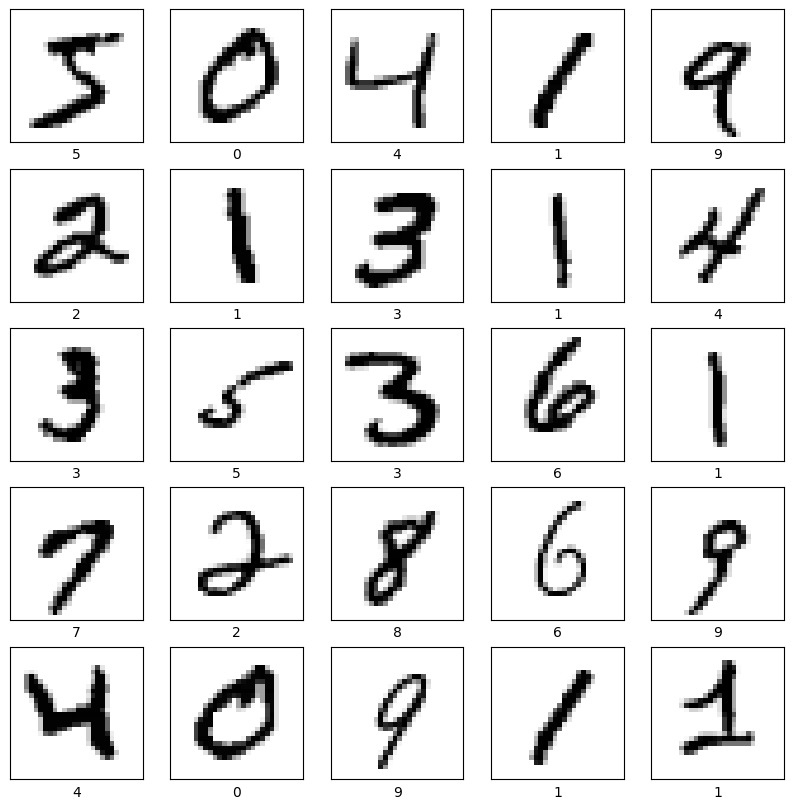

In [16]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
  plt.subplot(num_cells,num_cells,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()






In [19]:
x_train_with_channel = x_train.reshape(
 x_train.shape[0],
 IMAGE_WIDTH,
 IMAGE_HEIGHT,
 IMAGE_CHANNELS
)
x_test_with_channel = x_test.reshape(
x_test.shape[0],
  IMAGE_WIDTH,
 IMAGE_HEIGHT,
 IMAGE_CHANNELS
)


In [20]:
print("x_train_with_channel:",x_train_with_channel.shape)
print("x_test_with_channel:",x_test_with_channel.shape)

x_train_with_channel: (60000, 28, 28, 1)
x_test_with_channel: (10000, 28, 28, 1)


In [21]:
x_train_normalized = x_train_with_channel / 255
x_test_normalized = x_test_with_channel / 255


In [22]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [26]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 8)           │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 16)          │           3,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,642 (818.91 KB)

 Trainable params: 209,642 (818.91 KB)

 Non-trainable params: 0 (0.00 B)

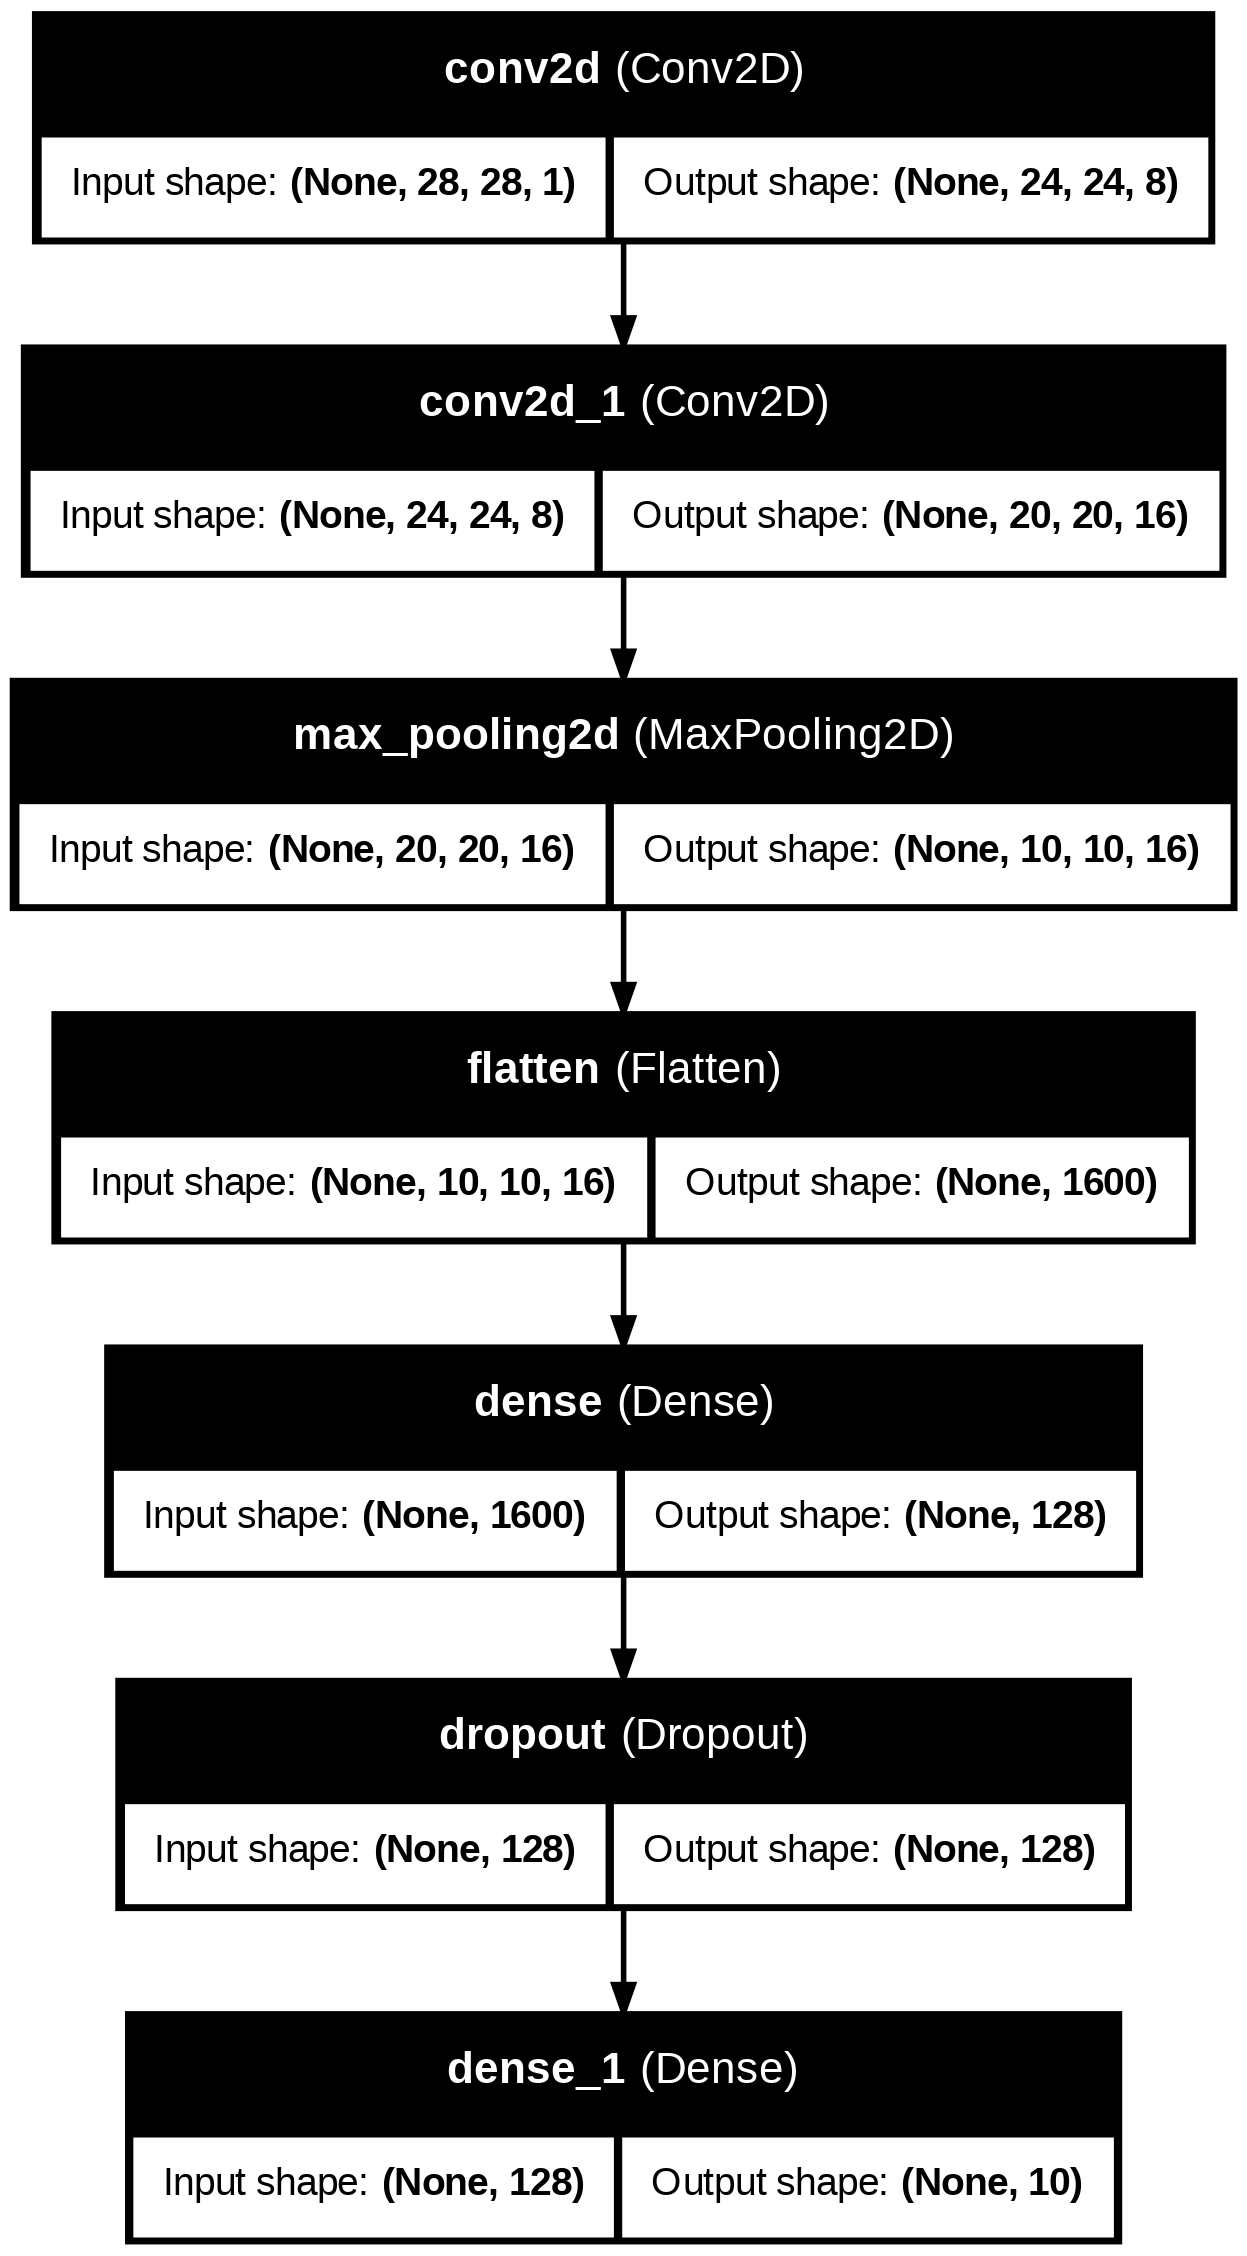

In [28]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    )

In [29]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=["accuracy"]

)

In [31]:
log_dir="logs/fit/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history=model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_data=(x_test,y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.8082 - loss: 3.6783 - val_accuracy: 0.9738 - val_loss: 0.0914
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9668 - loss: 0.1142 - val_accuracy: 0.9796 - val_loss: 0.0674
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9753 - loss: 0.0848 - val_accuracy: 0.9812 - val_loss: 0.0670
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 30ms/step - accuracy: 0.9800 - loss: 0.0706 - val_accuracy: 0.9846 - val_loss: 0.0620
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9811 - loss: 0.0624 - val_accuracy: 0.9773 - val_loss: 0.0875
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9849 - loss: 0.0500 - val_accuracy: 0.9844 - val_loss: 0.0614
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9885 - loss: 0.0395 - val_accuracy: 0.9822 - val_loss: 0.0797
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9887 -

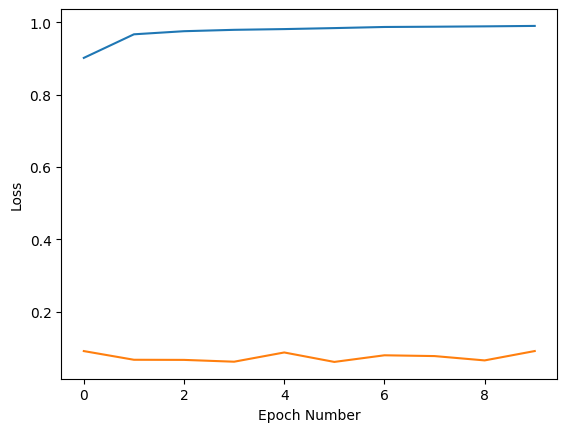

In [32]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_loss'])

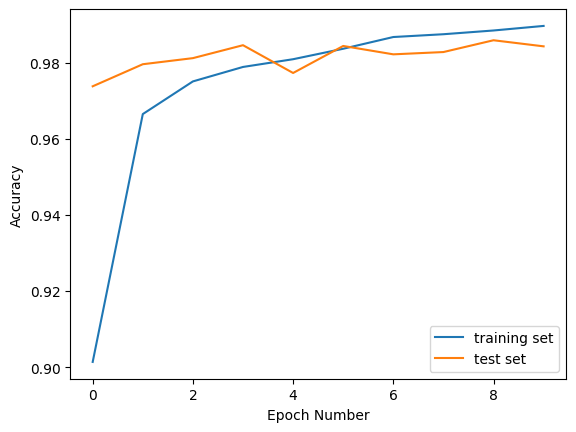

In [35]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()


In [41]:
%%capture
train_loss,train_accuracy=model.evaluate(x_train,y_train)
test_loss,test_accuracy=model.evaluate(x_test,y_test)


In [42]:
print('Training loss:',train_loss)
print('Training accuracy:',train_accuracy)
print('Test loss:',test_loss)
print('Test accuracy:',test_accuracy)





Training loss: 0.020024685189127922
Training accuracy: 0.994783341884613
Test loss: 0.0914604663848877
Test accuracy: 0.9843000173568726


In [43]:
print('validation loss:',train_loss)
print(' validation accuracy:',train_accuracy)
print('Test loss:',test_loss)
print('Test accuracy:',test_accuracy)


validation loss: 0.020024685189127922
 validation accuracy: 0.994783341884613
Test loss: 0.0914604663848877
Test accuracy: 0.9843000173568726


In [44]:
model_name = 'digit_recognition_model.h5'
model.save(model_name, save_format='h5')
loaded_model = tf.keras.models.load_model(model_name)

In [50]:
predictions_one_hot = loaded_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [51]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [52]:
pd.DataFrame(predictions)


,0,1,2,3,4,5,6,7,8,9
0,3.886098e-32,1.039891e-22,1.048249e-25,1.401216e-32,4.295337e-24,2.294315e-34,0.000000e+00,9.999999e-01,2.565893e-30,1.919402e-19
1,4.519990e-24,5.043761e-31,9.999999e-01,2.520063e-26,1.348710e-37,0.000000e+00,4.770859e-38,9.844878e-33,2.041555e-28,0.000000e+00
2,6.239655e-30,9.999999e-01,4.310318e-34,1.015391e-37,2.979726e-22,2.995464e-30,5.968597e-27,1.925054e-20,1.606236e-20,4.716279e-25
3,9.999999e-01,1.569019e-15,7.856781e-14,1.400516e-17,2.014732e-13,9.696283e-17,5.134572e-10,8.534646e-16,2.486408e-11,4.627153e-12
4,0.000000e+00,1.153247e-31,5.769399e-36,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,3.602414e-31,7.776201e-36,1.518556e-20
...,...,...,...,...,...,...,...,...,...,...
9995,3.819683e-16,1.136739e-12,9.999999e-01,1.489037e-13,3.027277e-20,1.902597e-28,1.675814e-24,7.973607e-12,6.284959e-19,8.974957e-24
9996,2.407507e-18,4.052471e-14,5.266090e-17,9.999999e-01,4.910566e-29,6.235931e-11,2.673465e-30,6.674484e-16,2.029403e-13,7.238065e-13
9997,0.000000e+00,1.485221e-33,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,1.174904e-37,8.230717e-35,9.975179e-27
9998,1.775328e-24,1.464197e-27,2.742251e-34,5.025005e-13,9.874860e-32,9.999999e-01,2.921701e-16,7.529765e-22,4.311858e-14,1.082415e-19


In [53]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


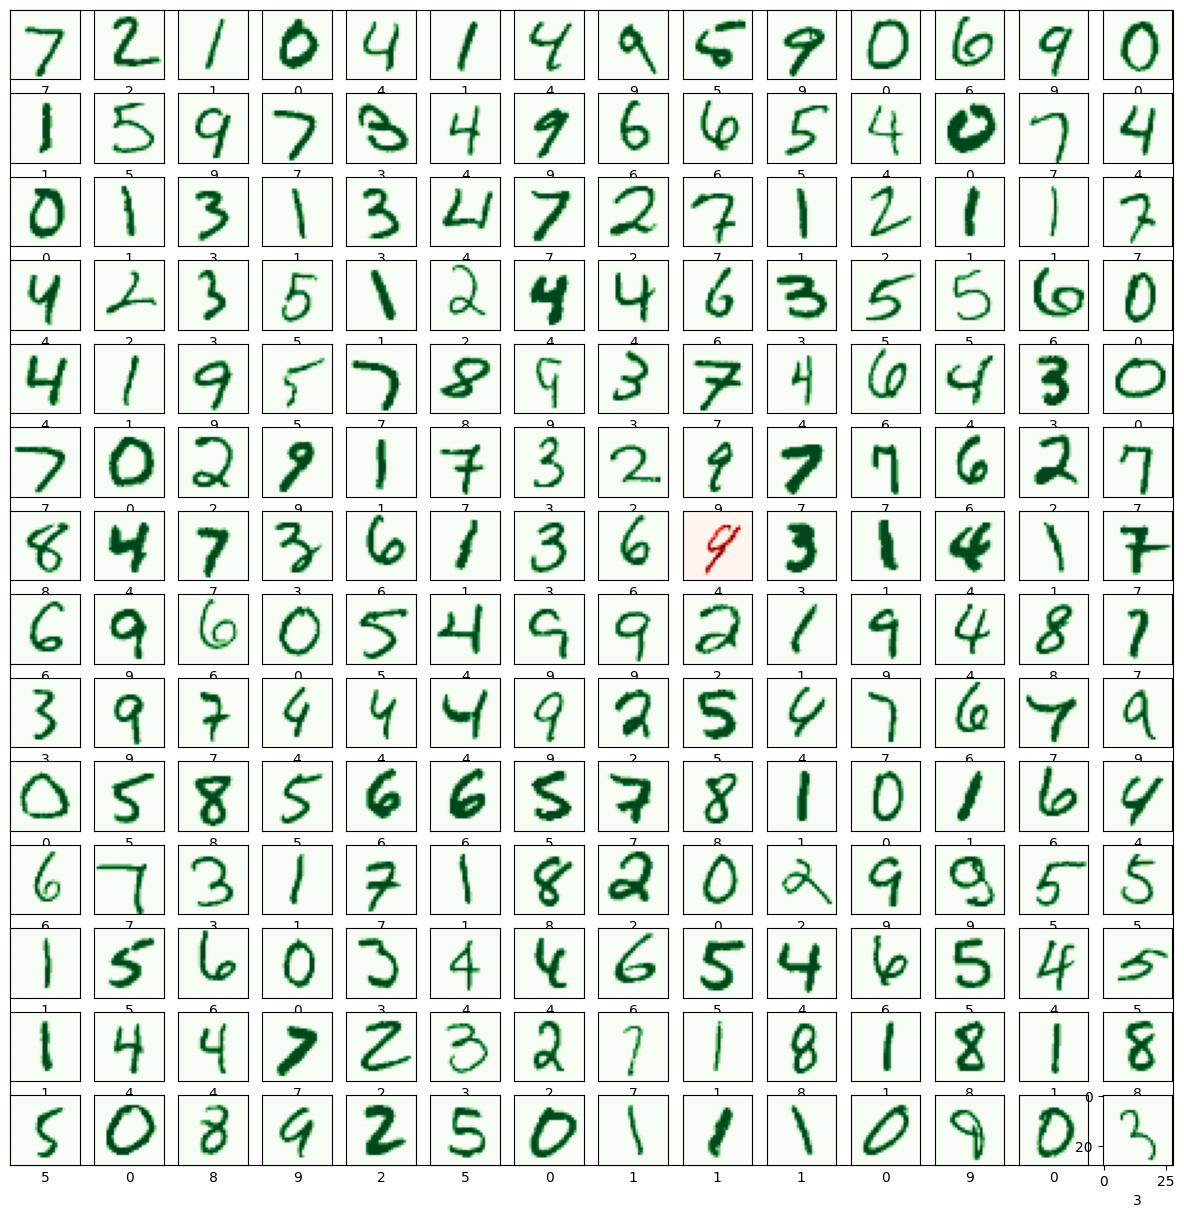

In [54]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map='Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.show()
